# Mathematical Image Analysis Final Project: Dataset Augmentation

## import libraries

In [30]:
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import numpy as np

## import sample image

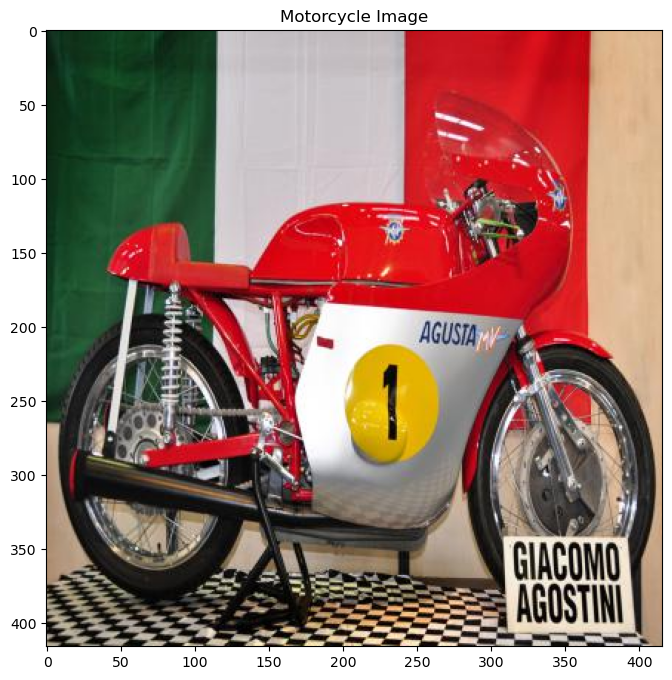

In [31]:
# Load the image using OpenCV (note: this loads in BGR format)
img = cv2.imread('motorcycle.jpg')
# Convert BGR to RGB for display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(10, 8))
plt.imshow(img_rgb)
plt.title('Motorcycle Image')
plt.axis('on')
plt.show()

# Keep the image for future cells
# Alternative loading with PIL if needed
# img_pil = Image.open('motorcycle.jpg')
# img_array = np.array(img_pil)

## helper functions

In [32]:
# changing exposure/brightness {brightening (1.5)}
def change_brightness(image, factor):
    """
    Change the brightness of an image by multiplying pixel values by a factor.
    :param image: Input image (numpy array)
    :param factor: Brightness factor (1.0 = no change, <1.0 = darker, >1.0 = brighter)
    :return: Brightened image (numpy array)
    """
    # Create brightened versions of the image with different intensity factors
    plt.figure(figsize=(15, 10))

    # Original image
    plt.subplot(2, 2, 1)
    plt.imshow(image)
    plt.title('Original Image')
    plt.axis('on')

    # Increase brightness by multiplying pixel values
    # Clip to ensure values stay within valid range (0-255)
    brightened = np.clip(image.astype(float) * factor, 0, 255).astype(np.uint8)

    # Display the brightened image
    plt.imshow(brightened)
    plt.title(f'Brightness factor: {factor}')
    plt.axis('on')

    plt.tight_layout()
    plt.show()

    return brightened

In [33]:
def change_contrast(image, factor):
    """
    Change the contrast of an image by adjusting pixel values around the mean.
    
    :param image: Input image (numpy array)
    :param factor: Contrast factor (1.0 = no change, <1.0 = lower contrast, >1.0 = higher contrast)
    :return: Contrast adjusted image (numpy array)
    """
    # Calculate the mean pixel value as the reference point
    mean = np.mean(image, axis=(0, 1))
    
    # Adjust the contrast by moving pixel values away from or toward the mean
    # Formula: new_pixel = mean + factor * (old_pixel - mean)
    adjusted = mean + factor * (image.astype(float) - mean)
    
    # Clip to ensure values stay within valid range (0-255)
    adjusted = np.clip(adjusted, 0, 255).astype(np.uint8)
    
    # Display the original and contrast-adjusted images
    plt.figure(figsize=(15, 10))
    
    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Original Image')
    plt.axis('on')
    
    # Contrast adjusted image
    plt.subplot(1, 2, 2)
    plt.imshow(adjusted)
    plt.title(f'Contrast factor: {factor}')
    plt.axis('on')
    
    plt.tight_layout()
    plt.show()
    
    return adjusted

In [49]:
def change_saturation(image, factor):
    """
    Change the saturation of an image by converting to HSV, adjusting saturation, and converting back to RGB.
    
    :param image: Input image (numpy array)
    :param factor: Saturation factor (1.0 = no change, <1.0 = less saturated, >1.0 = more saturated)
    :return: Saturation adjusted image (numpy array)
    """
    # Convert the image from RGB to HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    
    # Adjust the saturation channel
    hsv_image[:, :, 1] = np.clip(hsv_image[:, :, 1] * factor, 0, 255)
    
    # Convert back to RGB
    adjusted = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)
    
    # Display the original and saturation-adjusted images
    plt.figure(figsize=(15, 10))
    
    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Original Image')
    plt.axis('on')
    
    # Saturation adjusted image
    plt.subplot(1, 2, 2)
    plt.imshow(adjusted)
    plt.title(f'Saturation factor: {factor}')
    plt.axis('on')
    
    plt.tight_layout()
    plt.show()
    
    return adjusted

## Point operations (I.4):  

### low brightness

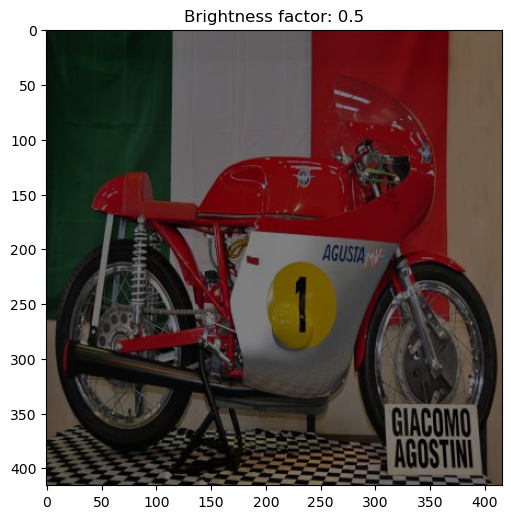

In [34]:
lower_brightness = change_brightness(img_rgb, 0.5)

### high brightness

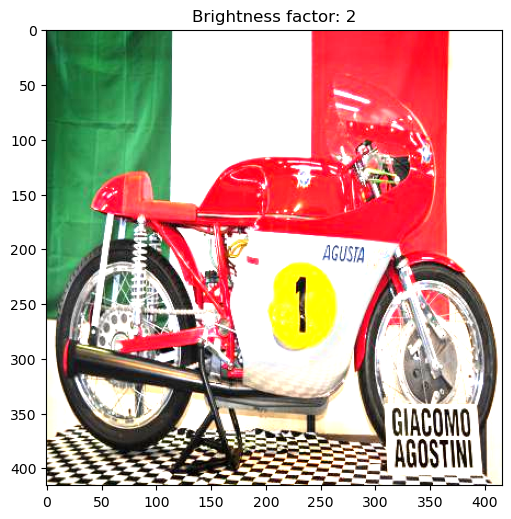

In [35]:
higher_brightness = change_brightness(img_rgb, 2)

### high contrast

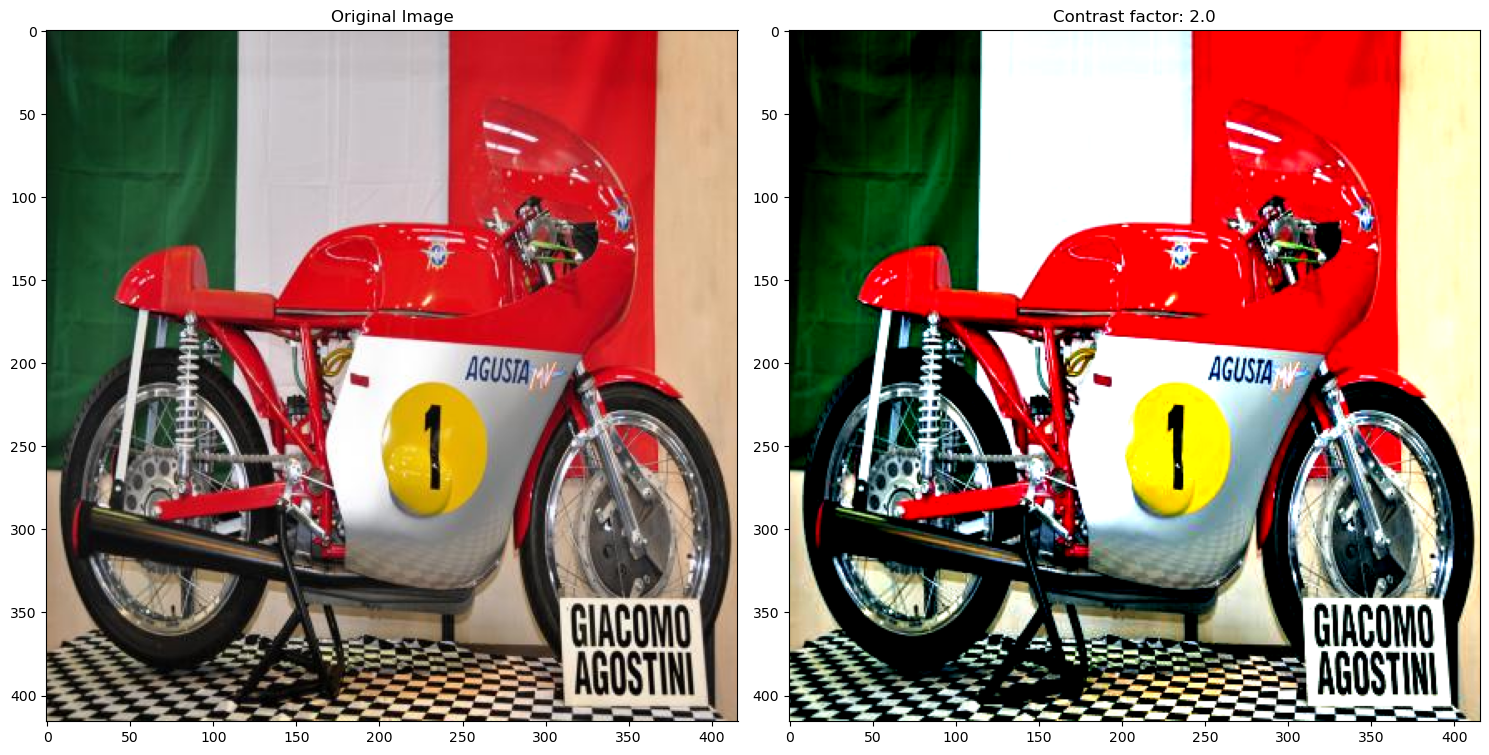

In [46]:
# contrast enhancement (I.6)
high_contrast = change_contrast(img_rgb, 2.0)

### low contrast

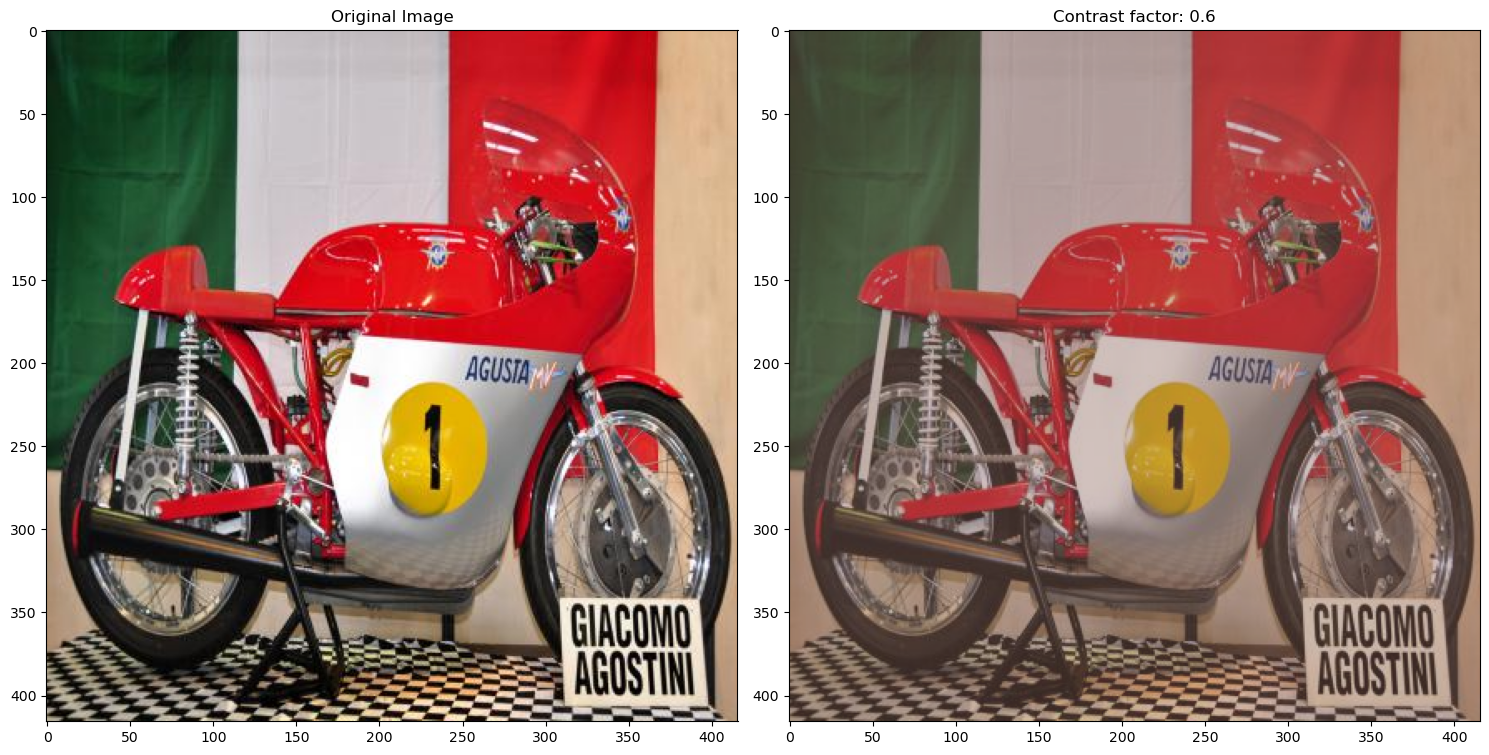

In [37]:
low_contrast = change_contrast(img_rgb, 0.6)

### high saturation

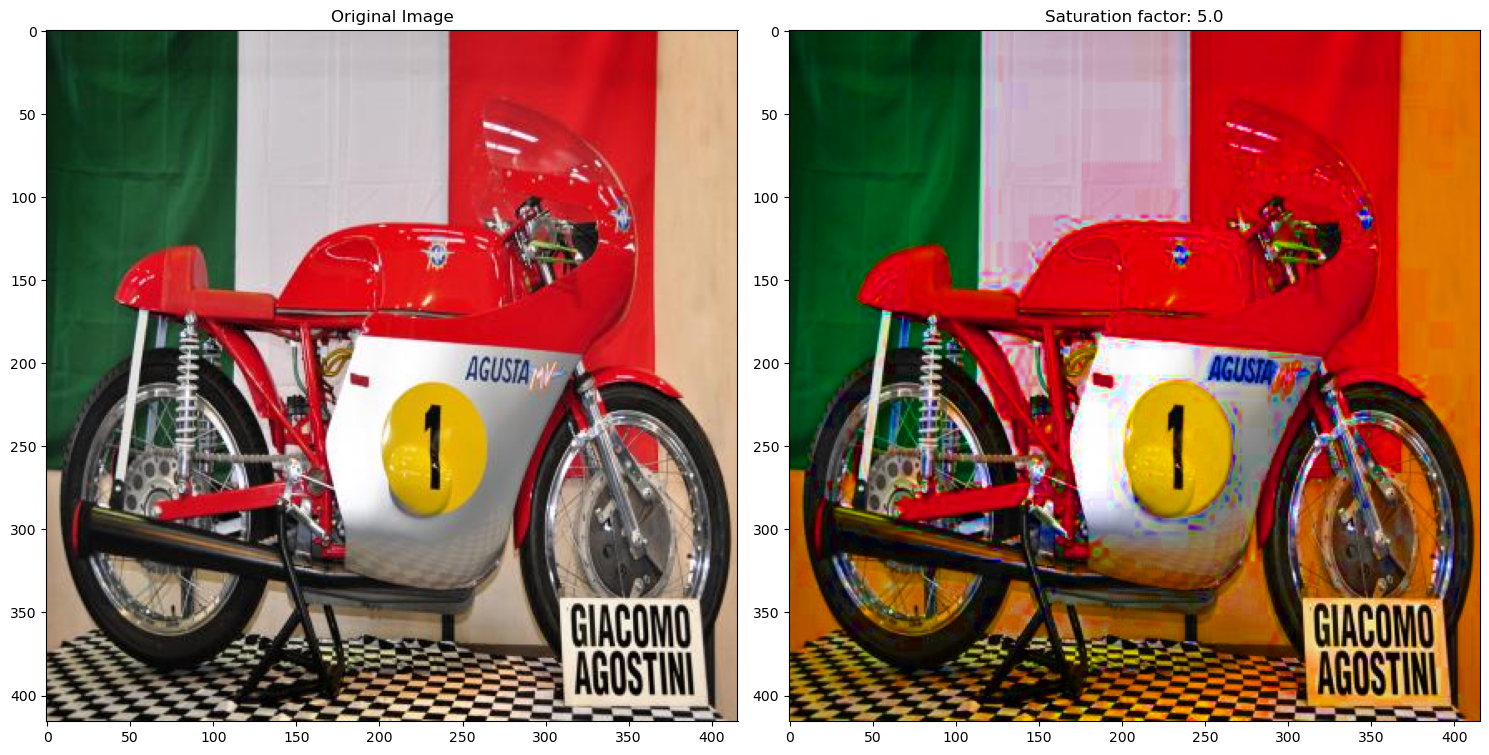

In [52]:
# enhancing saturation
high_saturation = change_saturation(img_rgb, 5.0)

### black & white

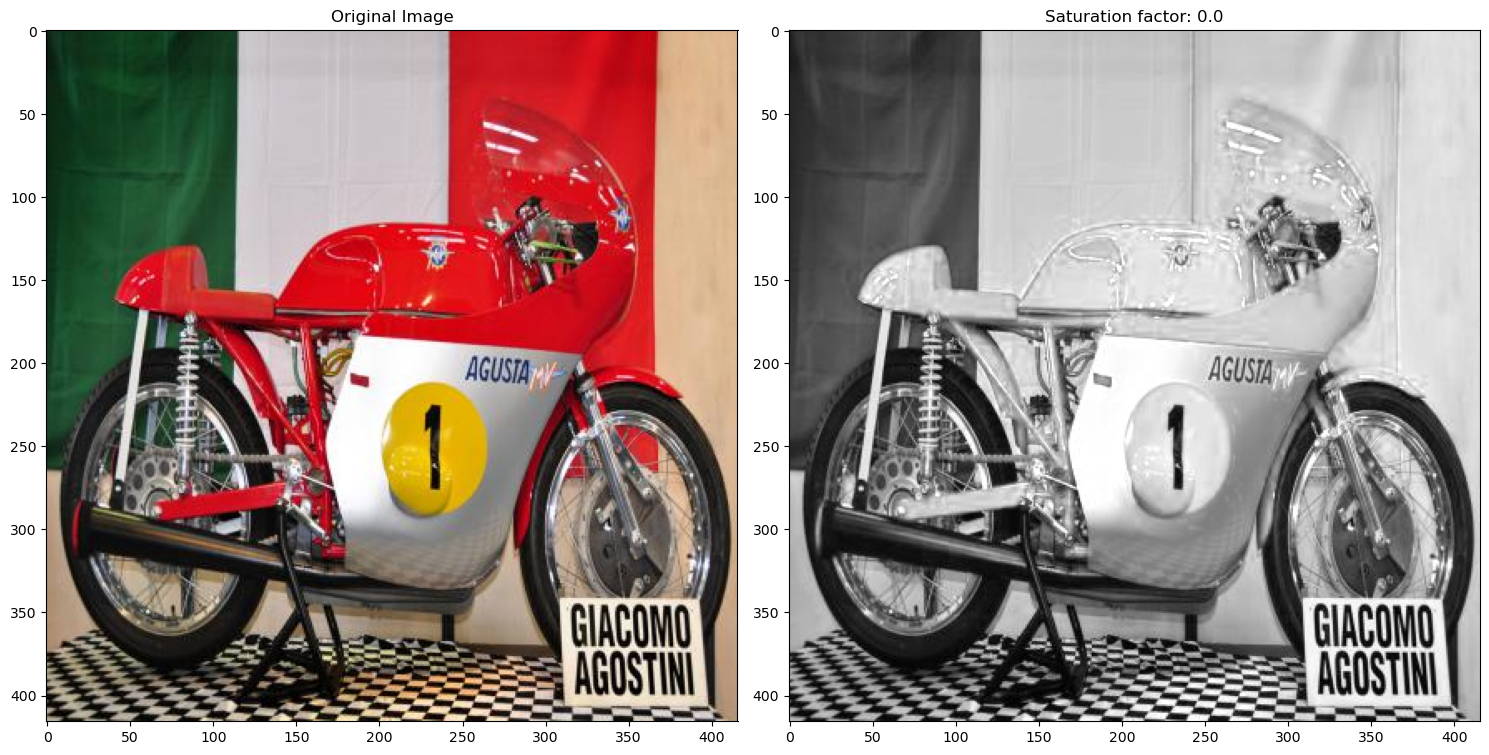

In [51]:
# converting to black and white
black_white = change_saturation(img_rgb, 0.0)

In [40]:
# Introducing random salt and pepper noise


# Filtering using convolution (I.7, 15)

In [41]:
# Gaussian Blur (example of weighted averaging filter (I.12))


In [42]:
# Sharpen the image (I.55-59)


# Other (from linear algebra review):


In [43]:
# Fixed/Random rotation

In [44]:
# Shearing; typically padded with 0s (I.9), change in basis

In [45]:
# Flipping image (reflection) 